<a href="https://colab.research.google.com/github/AdOrEx913/AIDL/blob/main/AIDL_PMA_Code_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"xinanli","key":"6dc34d5e31e3b3871604ed2d81fec410"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d slothkong/10-monkey-species

100% 545M/547M [00:04<00:00, 78.8MB/s]
100% 547M/547M [00:04<00:00, 125MB/s] 


In [4]:
!unzip 10-monkey-species.zip -d 10-monkey-species

Archive:  10-monkey-species.zip
  inflating: 10-monkey-species/monkey_labels.txt  
  inflating: 10-monkey-species/training/training/n0/n0018.jpg  
  inflating: 10-monkey-species/training/training/n0/n0019.jpg  
  inflating: 10-monkey-species/training/training/n0/n0020.jpg  
  inflating: 10-monkey-species/training/training/n0/n0021.jpg  
  inflating: 10-monkey-species/training/training/n0/n0022.jpg  
  inflating: 10-monkey-species/training/training/n0/n0023.jpg  
  inflating: 10-monkey-species/training/training/n0/n0024.jpg  
  inflating: 10-monkey-species/training/training/n0/n0025.jpg  
  inflating: 10-monkey-species/training/training/n0/n0026.jpg  
  inflating: 10-monkey-species/training/training/n0/n0027.jpg  
  inflating: 10-monkey-species/training/training/n0/n0028.jpg  
  inflating: 10-monkey-species/training/training/n0/n0029.jpg  
  inflating: 10-monkey-species/training/training/n0/n0030.jpg  
  inflating: 10-monkey-species/training/training/n0/n0031.jpg  
  inflating: 10-monke

In [5]:
train_dir = "/content/10-monkey-species/training/training"
val_dir = "/content/10-monkey-species/validation/validation"

In [6]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest',
                                   rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)

In [7]:
height = 128
width = 128
channels = 3
batch_size = 64
num_classes = 10

training_set = train_datagen.flow_from_directory(train_dir,
                                                 target_size = (height, width),
                                                 batch_size = batch_size,
                                                 seed = 7,
                                                 class_mode = "categorical")

val_set = val_datagen.flow_from_directory(val_dir,
                                          target_size = (height, width),
                                          batch_size = batch_size,
                                          seed = 7,
                                          shuffle = False,
                                          class_mode = 'categorical')

Found 1098 images belonging to 10 classes.
Found 272 images belonging to 10 classes.


In [8]:
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D 

cnn = Sequential()

In [9]:
cnn.add(Conv2D(filters=32, kernel_size=3, padding='SAME',
               activation='relu', 
               input_shape=(width, height, channels)))
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D(pool_size=2, strides=2, padding='SAME'))
cnn.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D(pool_size=2, strides=2, padding='SAME'))
cnn.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D(pool_size=2, strides=2, padding='SAME'))
cnn.add(Flatten())
cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.25))
cnn.add(Dense(num_classes, activation='softmax'))

In [10]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 62, 62, 64)       256       
 hNormalization)                                                 
                                                        

In [16]:
from keras import losses

cnn.compile(optimizer = 'adam', 
            loss = losses.CategoricalCrossentropy(), 
            metrics = ['accuracy'])

history = cnn.fit(training_set, validation_data = val_set, epochs = 30)

Epoch 1/30
18/18 [==============================] - 38s 2s/step - loss: 1.9614 - accuracy: 0.3525 - val_loss: 10.1195 - val_accuracy: 0.1397
Epoch 2/30
18/18 [==============================] - 37s 2s/step - loss: 1.7925 - accuracy: 0.3652 - val_loss: 10.0280 - val_accuracy: 0.1581
Epoch 3/30
18/18 [==============================] - 36s 2s/step - loss: 1.7739 - accuracy: 0.3880 - val_loss: 9.5384 - val_accuracy: 0.1029
Epoch 4/30
18/18 [==============================] - 37s 2s/step - loss: 1.7244 - accuracy: 0.4244 - val_loss: 9.4084 - val_accuracy: 0.1434
Epoch 5/30
18/18 [==============================] - 38s 2s/step - loss: 1.7700 - accuracy: 0.4098 - val_loss: 9.2978 - val_accuracy: 0.1103
Epoch 6/30
18/18 [==============================] - 38s 2s/step - loss: 1.6213 - accuracy: 0.4244 - val_loss: 10.0266 - val_accuracy: 0.1287
Epoch 7/30
18/18 [==============================] - 36s 2s/step - loss: 1.6789 - accuracy: 0.4162 - val_loss: 8.0699 - val_accuracy: 0.1250
Epoch 8/30
18/18 

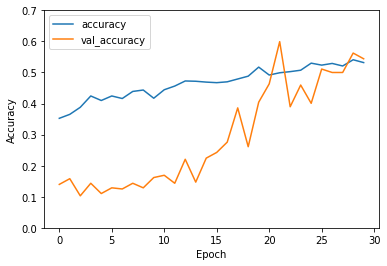

In [21]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 0.7])
plt.legend(loc='upper left')